In [159]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
iris = pd.read_csv("iris.csv")

In [161]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [162]:
iris.shape

(150, 5)

In [163]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [164]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Figure size 1080x1080 with 0 Axes>

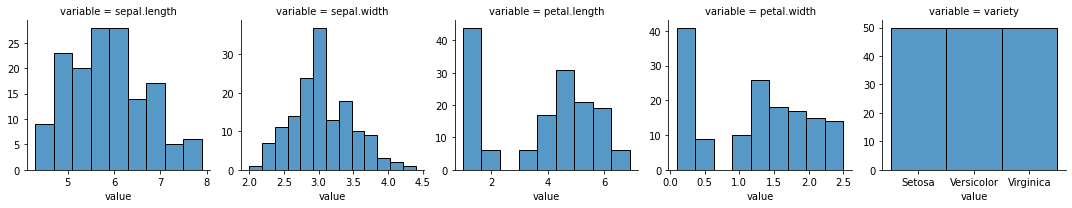

In [165]:
plt.figure(figsize=(15,15))
f = pd.melt(iris)
facet = sns.FacetGrid(f, col_wrap=5, col="variable", sharex=False, sharey=False)
facet = facet.map(sns.histplot, "value", kde=False)
plt.show()

## 1. Handle Data

In [166]:
import csv
with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))

sepal.length, sepal.width, petal.length, petal.width, variety
5.1, 3.5, 1.4, .2, Setosa
4.9, 3, 1.4, .2, Setosa
4.7, 3.2, 1.3, .2, Setosa
4.6, 3.1, 1.5, .2, Setosa
5, 3.6, 1.4, .2, Setosa
5.4, 3.9, 1.7, .4, Setosa
4.6, 3.4, 1.4, .3, Setosa
5, 3.4, 1.5, .2, Setosa
4.4, 2.9, 1.4, .2, Setosa
4.9, 3.1, 1.5, .1, Setosa
5.4, 3.7, 1.5, .2, Setosa
4.8, 3.4, 1.6, .2, Setosa
4.8, 3, 1.4, .1, Setosa
4.3, 3, 1.1, .1, Setosa
5.8, 4, 1.2, .2, Setosa
5.7, 4.4, 1.5, .4, Setosa
5.4, 3.9, 1.3, .4, Setosa
5.1, 3.5, 1.4, .3, Setosa
5.7, 3.8, 1.7, .3, Setosa
5.1, 3.8, 1.5, .3, Setosa
5.4, 3.4, 1.7, .2, Setosa
5.1, 3.7, 1.5, .4, Setosa
4.6, 3.6, 1, .2, Setosa
5.1, 3.3, 1.7, .5, Setosa
4.8, 3.4, 1.9, .2, Setosa
5, 3, 1.6, .2, Setosa
5, 3.4, 1.6, .4, Setosa
5.2, 3.5, 1.5, .2, Setosa
5.2, 3.4, 1.4, .2, Setosa
4.7, 3.2, 1.6, .2, Setosa
4.8, 3.1, 1.6, .2, Setosa
5.4, 3.4, 1.5, .4, Setosa
5.2, 4.1, 1.5, .1, Setosa
5.5, 4.2, 1.4, .2, Setosa
4.9, 3.1, 1.5, .2, Setosa
5, 3.2, 1.2, .2, Setosa
5.5, 3.5, 1.3, .2, Setos

In [167]:
import csv
import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        has_header = csv.Sniffer().has_header(csvfile.read(1024))
        csvfile.seek(0)
        lines = csv.reader(csvfile)
        
        if has_header:
            next(lines)
            
        dataset = list(lines)
        
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            
            if random.random() < split:
                # add to training set
                trainingSet.append(dataset[x])
            else:
                # add to test set
                testSet.append(dataset[x])

trainingSet=[]
testSet=[]

loadDataset('iris.data.txt', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)) )

Train: 92
Test: 58


## 2. Similarity 

In [168]:
import math

def euclideanDistance(instance1, instance2, length, degree=2):
    #   Complete the function
    distance = 0
    for i in range(length):
        distance += (instance2[i]-instance1[i])**2

    return math.sqrt(distance)

data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print('Distance: ' + repr(distance))

Distance: 3.4641016151377544


## 3. Neighbors

In [169]:
import operator

def getNeighbors(trainingSet, testInstance, k, distanceFunc, degree=2):
    distances = []
    length = len(testInstance)-1

    for x in range(len(trainingSet)):
        dist = distanceFunc(testInstance, trainingSet[x], length, degree)
        distances.append((trainingSet[x], dist))

    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])

    return neighbors

# We can test out this function as follows:

trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]

k = 1
neighbors = getNeighbors(trainSet, testInstance, k, euclideanDistance)
print(neighbors)

[[4, 4, 4, 'b']]


## 4. Response

In [170]:
import operator

def getResponse(neighbors):
    classVotes = {}

    for x in range(len(neighbors)):
        response = neighbors[x][len(neighbors[x])-1] #complete with appropriate number

        if response in classVotes:
            # increase frequency by +1
            classVotes[response] +=1
        else:
            # add the new neighbor class to classVotes variable
            classVotes[response] = 1
    

    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

# We can test out this function with some test neighbors, as follows:

neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)
print(response)

a


## 5. Accuracy

In [171]:
def getAccuracy(testSet, predictions):
    # Complete the function
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][len(testSet[x])-1] == predictions[x]:
            correct +=1
   
    return (correct/float(len(testSet))) * 100.0

# We can test this function with a test dataset and predictions, as follows:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


## 6. Main

Assembling all the previous steps into one main function.

In [172]:
def main(dataset_filename, k, split, distanceFunc):
    trainingSet, testSet = [], []

    loadDataset(dataset_filename, split, trainingSet, testSet)
    
    predictions = []
    for testInstance in testSet:
        neighbors = getNeighbors(trainingSet, testInstance[:-1], k, distanceFunc)
        response = getResponse(neighbors)
        predictions.append(response)
        
    accuracy = getAccuracy(testSet, predictions)
    print("Accuracy = %.2f" % accuracy)

In [173]:
main("iris.data.txt", 5, 0.66, euclideanDistance)

Accuracy = 91.11


### Optimal k value

In [178]:
def main2(dataset_filename, k, split, distanceFunc, degree=2):
    trainingSet, testSet = [], []

    loadDataset(dataset_filename, split, trainingSet, testSet)
    accuracies = {}
    for i in range(1, k):
        predictions = []
        for testInstance in testSet:
            neighbors = getNeighbors(trainingSet, testInstance[:-1], i, distanceFunc, degree)
            response = getResponse(neighbors)
            predictions.append(response)
        
        accuracy = getAccuracy(testSet, predictions)
        accuracies[str(i)] = accuracy

    print(sorted(accuracies.items(), key=operator.itemgetter(1), reverse=True))
    plt.figure(figsize=[35,10])
    plt.plot(accuracies.values())
    

[('1', 97.5609756097561), ('2', 97.5609756097561), ('4', 97.5609756097561), ('6', 97.5609756097561), ('7', 97.5609756097561), ('8', 97.5609756097561), ('9', 97.5609756097561), ('10', 97.5609756097561), ('11', 97.5609756097561), ('12', 97.5609756097561), ('13', 97.5609756097561), ('14', 97.5609756097561), ('15', 97.5609756097561), ('16', 97.5609756097561), ('17', 97.5609756097561), ('18', 97.5609756097561), ('19', 97.5609756097561), ('20', 97.5609756097561), ('21', 97.5609756097561), ('22', 97.5609756097561), ('23', 97.5609756097561), ('24', 97.5609756097561), ('3', 95.1219512195122), ('5', 95.1219512195122), ('25', 95.1219512195122), ('26', 95.1219512195122), ('27', 95.1219512195122), ('28', 95.1219512195122), ('29', 95.1219512195122)]


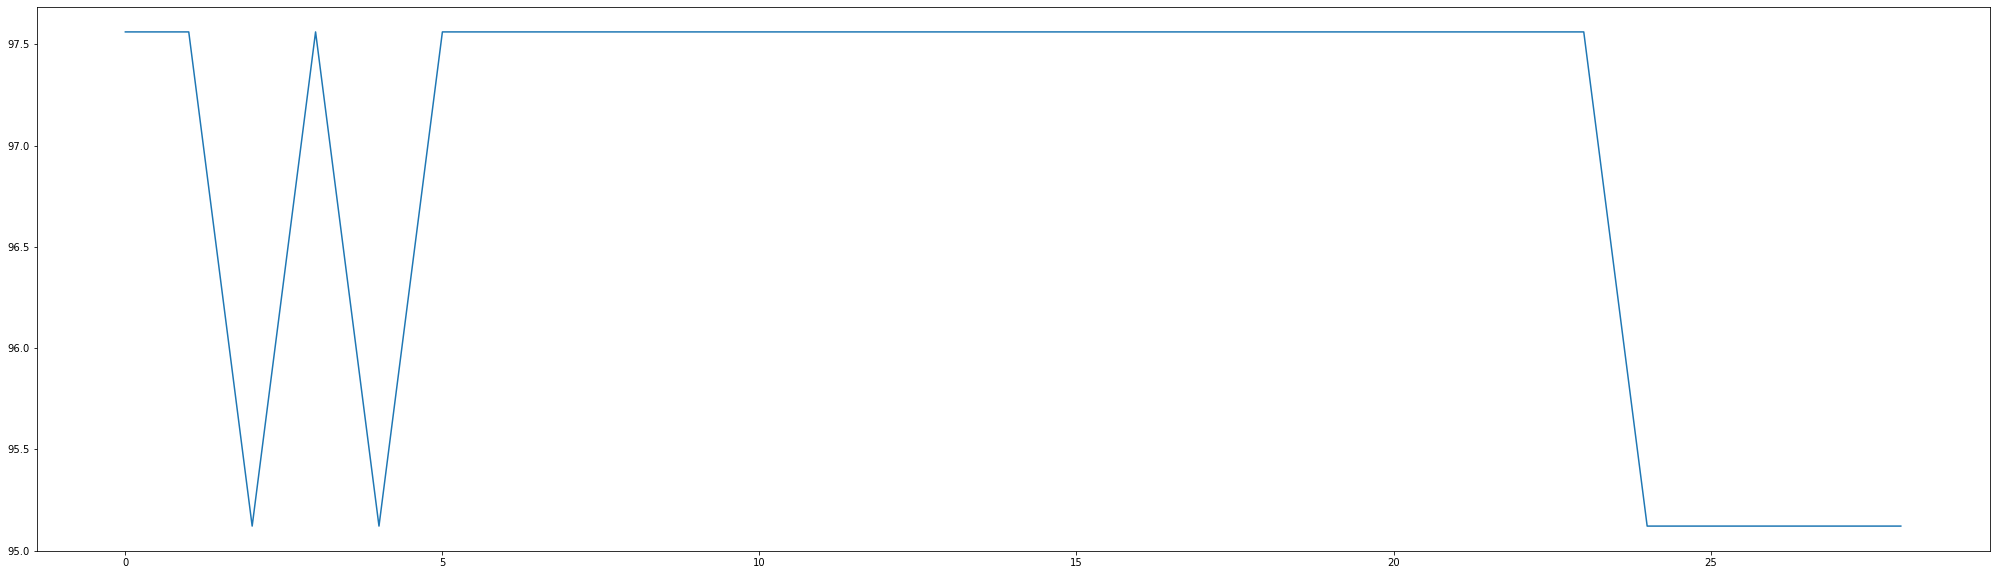

In [179]:
main2("iris.data.txt", 30, 0.66, euclideanDistance)

## 7. Another distance metric

Define another distance metric and use it in the main function for predition.

In [185]:
def manhattanDistance(instance1, instance2, length, degree=1):
    #   Complete the function
    distance = 0
    for i in range(length):
        distance += abs(instance2[i]-instance1[i])

    return distance

[('1', 91.22807017543859), ('2', 91.22807017543859), ('6', 91.22807017543859), ('7', 91.22807017543859), ('8', 91.22807017543859), ('9', 91.22807017543859), ('10', 91.22807017543859), ('11', 91.22807017543859), ('12', 91.22807017543859), ('3', 89.47368421052632), ('4', 89.47368421052632), ('5', 87.71929824561403), ('13', 87.71929824561403), ('14', 87.71929824561403), ('16', 87.71929824561403), ('15', 85.96491228070175), ('17', 85.96491228070175), ('18', 85.96491228070175), ('19', 84.21052631578947), ('20', 84.21052631578947), ('22', 84.21052631578947), ('28', 84.21052631578947), ('21', 82.45614035087719), ('23', 82.45614035087719), ('24', 82.45614035087719), ('25', 82.45614035087719), ('26', 82.45614035087719), ('27', 82.45614035087719), ('29', 82.45614035087719)]


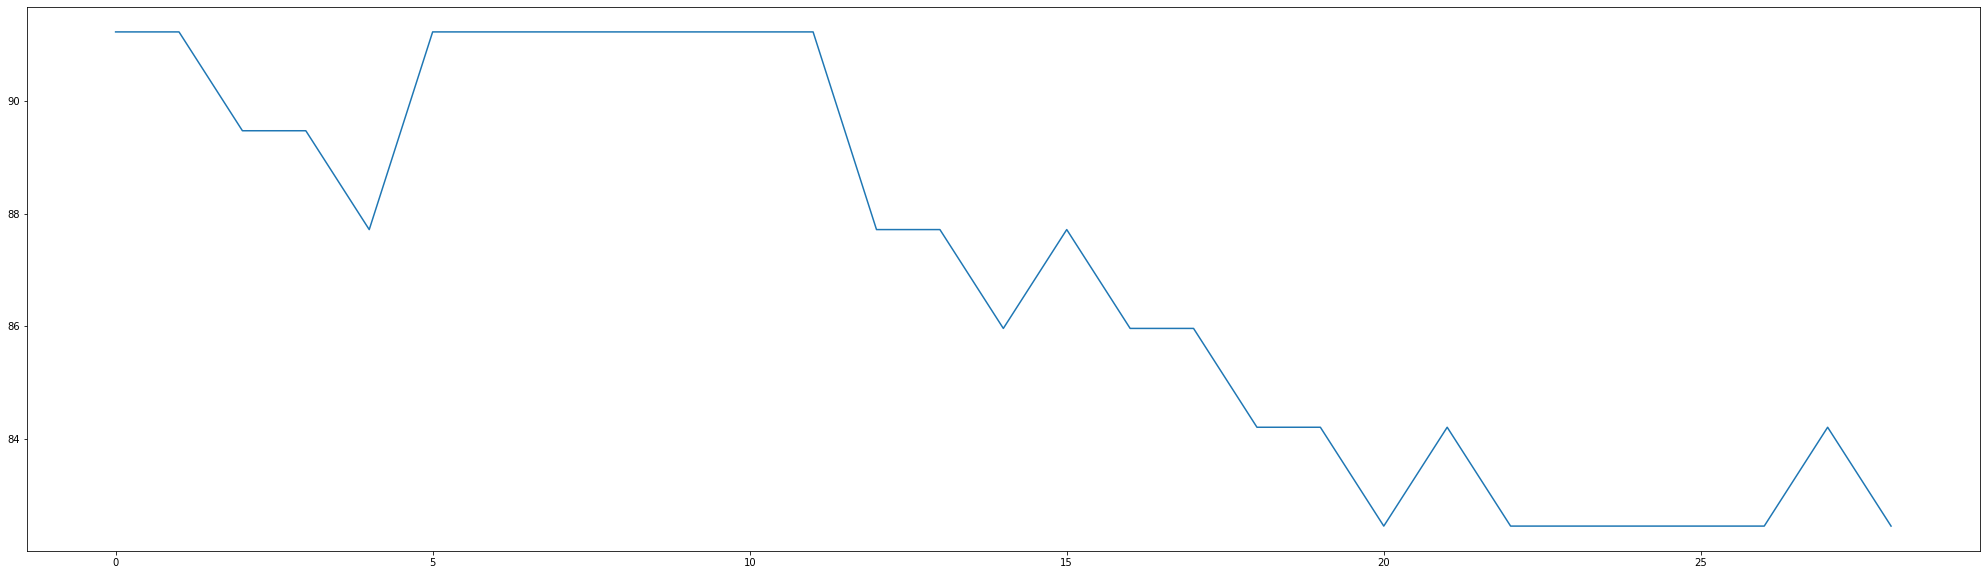

In [181]:
main2("iris.data.txt", 30, 0.66, manhattanDistance)

In [184]:
def minkowskiDistance(instance1, instance2, length, degree):
    #   Complete the function
    distance = 0
    for i in range(length):
        distance += pow(abs(instance2[i]-instance1[i]), degree)

    return pow(distance, 1/degree)

[('12', 94.82758620689656), ('1', 93.10344827586206), ('2', 93.10344827586206), ('5', 93.10344827586206), ('6', 93.10344827586206), ('8', 93.10344827586206), ('10', 93.10344827586206), ('14', 93.10344827586206), ('17', 93.10344827586206), ('18', 93.10344827586206), ('4', 91.37931034482759), ('7', 91.37931034482759), ('9', 91.37931034482759), ('11', 91.37931034482759), ('13', 91.37931034482759), ('16', 91.37931034482759), ('20', 91.37931034482759), ('3', 89.65517241379311), ('15', 89.65517241379311), ('22', 89.65517241379311), ('19', 87.93103448275862), ('21', 87.93103448275862), ('23', 87.93103448275862), ('24', 87.93103448275862), ('25', 87.93103448275862), ('26', 87.93103448275862), ('27', 87.93103448275862), ('28', 87.93103448275862), ('29', 87.93103448275862)]


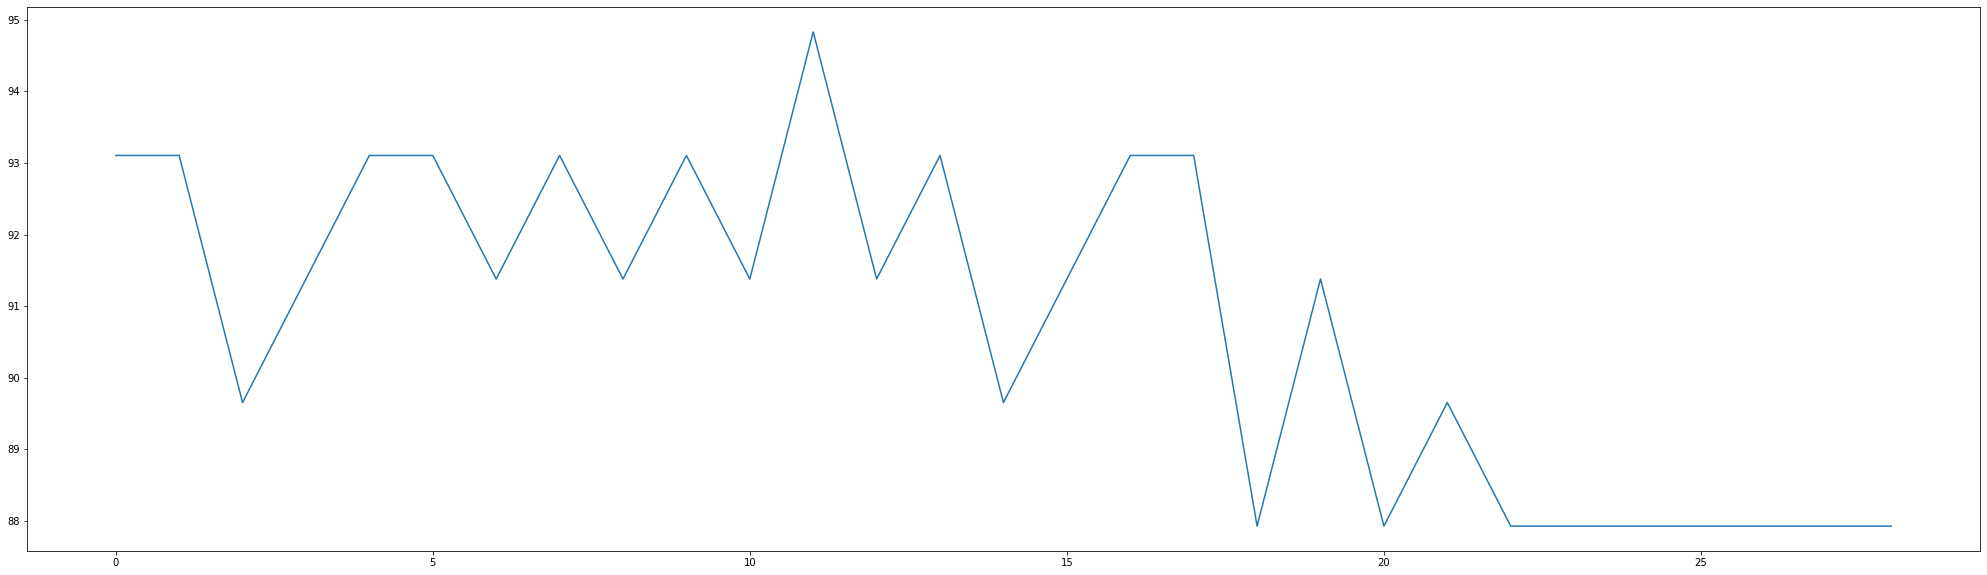

In [183]:
main2("iris.data.txt", 30, 0.66, minkowskiDistance, 3)